In [551]:
# Imports
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [562]:
# Define o caminho e inicializa a imagem

path = '../testimages/'
source = 'img_9.jpg'
image = Image.open(path+source)
image = np.asarray(image)

../testimages/img_9.jpg


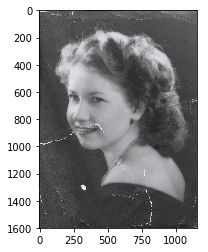

In [560]:
plt.imshow(image)

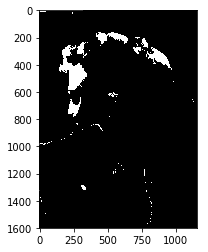

In [554]:
#create HSV and grayscale formats
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#define variables used in masking
max_gray = np.amax(gray)
min_color = np.array([0,0,max_gray-60])
max_color = np.array([255,60,max_gray])

#create initial region mask
reg = cv2.inRange(hsv, min_color, max_color)

plt.imshow(mask, cmap="gray")

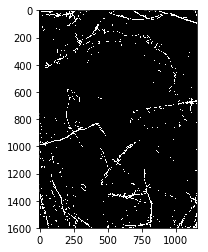

In [555]:
#blur the image for better line detection
blur = cv2.GaussianBlur(gray,(3, 3),0)

#define morphologial transformation kernel
kernel = np.ones((3,3),np.uint8)

#create edges and dilate to get better results
edges = cv2.Canny(gray, 100, 150)
edges = cv2.dilate(edges, kernel)
plt.imshow(edges, cmap="gray")

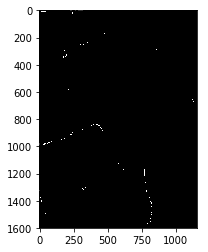

In [564]:
#intersection of region and edges
mask = reg & edges
cv2.imwrite('mask_'+source, mask)
plt.imshow(mask, cmap="gray")